In [1]:
import pandas as pd
import prophet as Prophet
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [13]:
perps_crim = pd.read_csv('CSV/board-exam-results - PERP-Crim.csv')

perps_crim['Year'] = perps_crim['Time Date'].apply(lambda x: str(x)[-4:])
perps_crim['Month'] = perps_crim['Time Date'].apply(lambda x: str(x)[-6:-4])
perps_crim['Day'] = perps_crim['Time Date'].apply(lambda x: str(x)[:-6])
perps_crim['ds'] = pd.DatetimeIndex(perps_crim['Year']+'-'+perps_crim['Month']+'-'+perps_crim['Day'])

perps_crim.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
perps_crim.columns = ['y', 'ds']

m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
perps_crim_model = m.fit(perps_crim)

# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 1, 8), datetime(2023, 1, 28), datetime(2024, 1, 8), datetime(2024, 1, 28), datetime(2025, 1, 8), datetime(2025, 1, 28), datetime(2026, 1, 8), datetime(2026, 1, 28), datetime(2027, 1, 8), datetime(2027, 1, 28), datetime(2028, 1, 8), datetime(2028, 1, 28), datetime(2029, 1, 8), datetime(2029, 1, 28), datetime(2030, 1, 8), datetime(2030, 1, 28)]

# Create a dataframe with those specific dates
perps_crim_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
perps_crim_forecast = m.predict(perps_crim_future)
perps_crim_forecast['yhat'] = perps_crim_forecast['yhat'].clip(lower=0, upper=100).round()

13:25:21 - cmdstanpy - INFO - Chain [1] start processing
13:25:23 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
perps_crim_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-01-08,10.0
1,2023-01-28,62.0
2,2024-01-08,0.0
3,2024-01-28,74.0
4,2025-01-08,0.0
5,2025-01-28,0.0
6,2026-01-08,0.0
7,2026-01-28,7.0
8,2027-01-08,0.0
9,2027-01-28,19.0


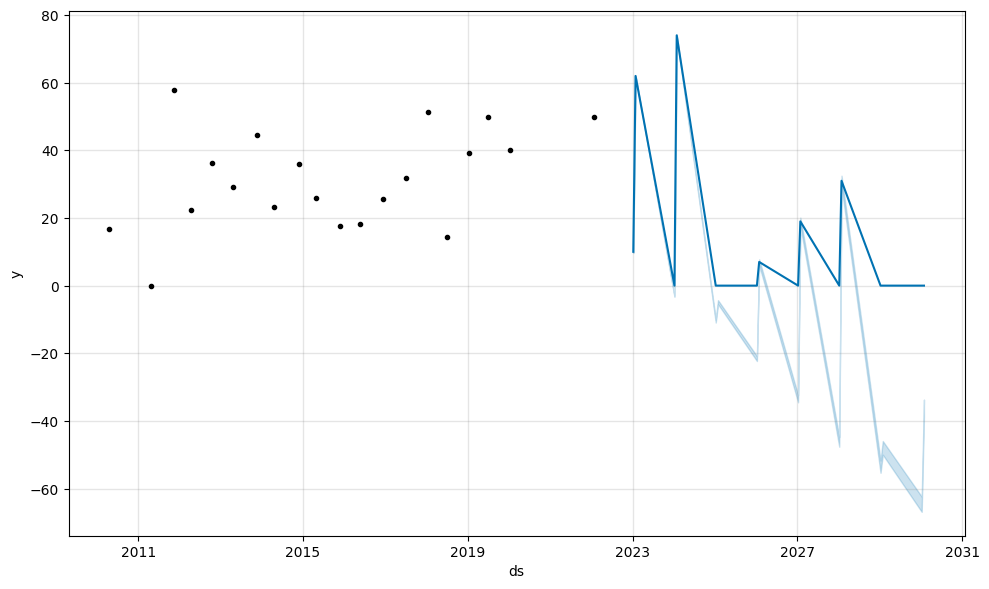

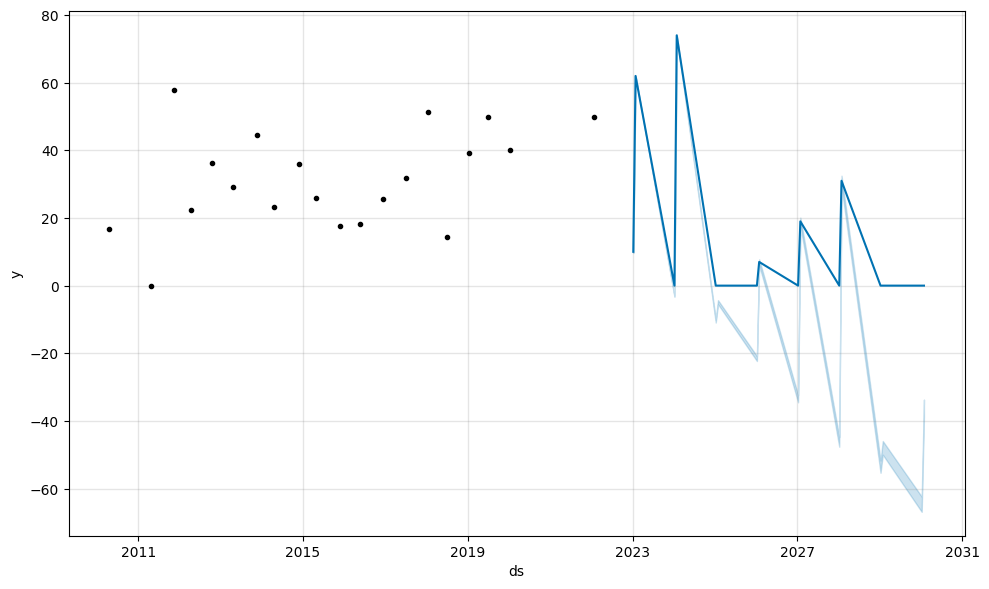

In [15]:
m.plot(perps_crim_forecast)